In [4]:
import lib.experimentize as E
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from src.core import Core, Params, DATASETS, FEATURE_SELECTION_METHODS

@E.experimentize(Params)
class Experiment(Core):
    def run(self, *, method=E.param(as_func="feature_selection_{}")):
        train_x, test_x, train_y, test_y = self.train_test_split()
        selector = method(train_x, train_y)
        train_x, test_x = selector(train_x), selector(test_x)

        automl = self.auto_classifier()
        automl.fit(train_x, train_y)
        features = train_x.shape[1]
        return {
            **self.get_scores(test_y, automl.predict(test_x), features),
            "Features": features
        }

def plot(results):
    g = sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Accuracy", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()
    g = sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Score", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()

In [5]:
grid = [
    Params(method=method, dataset=dataset, max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for dataset in DATASETS
    for max_features in [5, 100]
    for seed in range(2)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark.pickle"))()
results

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,artificial,5,0,0.772152,0.772152,5
1,0,Random Forest,artificial,5,1,0.730000,0.730000,5
2,0,Random Forest,artificial,100,0,0.817007,0.627007,100
3,0,Random Forest,artificial,100,1,0.787500,0.597500,100
4,0,ANOVA,artificial,5,0,0.644714,0.644714,5
5,0,ANOVA,artificial,5,1,0.705000,0.705000,5
6,0,ANOVA,artificial,100,0,0.764426,0.574426,100
7,0,ANOVA,artificial,100,1,0.772500,0.582500,100
8,0,Mutual Info,artificial,5,0,0.659266,0.659266,5
9,0,Mutual Info,artificial,5,1,0.647500,0.647500,5


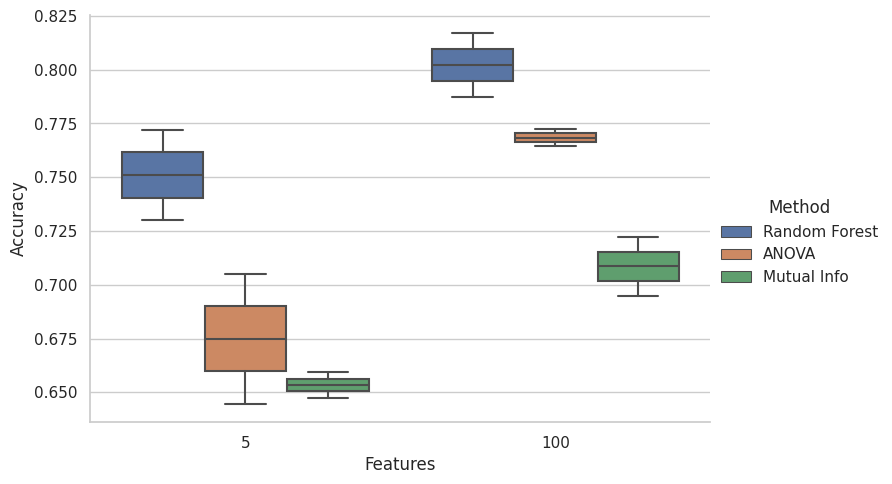

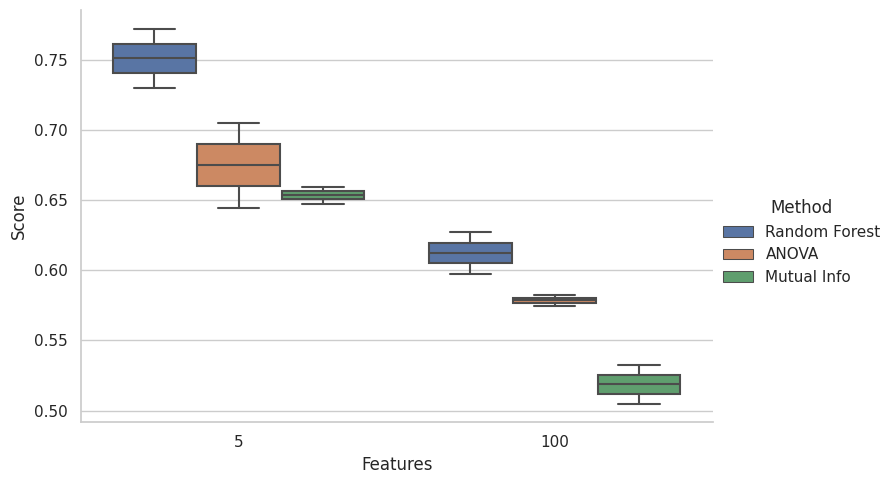

In [6]:
plot(results)